# Intro to CNN

* MNIST Example: 이전 결과는 97.8%

## (1) 데이터 로딩 및 확인 / 데이터 준비

In [1]:
from tensorflow.keras.datasets import mnist

(train_input, train_target), (test_input, test_target) = mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
train_input = train_input.reshape((60000, 28, 28, 1))
train_input = train_input.astype('float32') / 255.0

test_input = test_input.reshape((10000, 28, 28, 1))
test_input = test_input.astype('float32') / 255.0

print(train_input.shape, test_input.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## (2) 모델 정의

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

* Feature Map은 점점 줄어들지만, 채널 수 (필터의 개수)는 점점 늘어나는 게 일반적임!

* 기존의 DNN보다 일반적으로 파라미터의 개수가 훨씬 줄어들게 됨!

## (3) 컴파일

In [4]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## (4) 모델 학습

In [5]:
model.fit(
    train_input,
    train_target,
    epochs=5,
    batch_size=64
)

Epoch 1/5
938/938 [==============================] - 54s 56ms/step - loss: 0.1786 - accuracy: 0.9443
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0478 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0334 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0248 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0198 - accuracy: 0.9938


## (5) 성능평가

In [6]:
test_loss, test_acc = model.evaluate(test_input, test_target)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0236 - accuracy: 0.9920
Test Loss: 0.023625031113624573
Test Accuracy: 0.9919999837875366


## (6) Test Set에서 본 모델이 제대로 예측하지 못한 것들이 무엇인지 알아보기

In [7]:
import numpy as np

test_pred = model.predict(test_input)
print(test_pred.shape)

(10000, 10)


In [8]:
test_pred = np.argmax(test_pred, axis=1)
print(test_pred.shape)

(10000,)


In [9]:
len(test_pred[test_pred != test_target])

80

In [10]:
for idx, mispred in enumerate(test_pred != test_target):
    if mispred == True:
        print(idx)

18
62
321
340
445
582
625
659
882
947
1014
1039
1182
1232
1247
1459
1621
1709
1737
1878
1901
2018
2035
2130
2135
2266
2293
2329
2369
2414
2462
2597
2654
2742
2771
2927
2939
2995
3225
3289
3384
3422
3520
3559
3574
3762
3808
3850
3906
3941
3985
4027
4078
4176
4284
4380
4504
4507
4536
4547
4571
4838
5265
5937
5955
6560
6572
6576
6597
6625
6847
8408
9642
9643
9664
9679
9692
9729
9792
9839


Answer: 2
Predict: 7


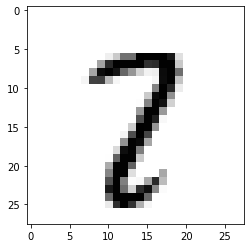

''

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = 321
print('Answer:', test_target[idx])
print('Predict:', test_pred[idx])

plt.imshow(test_input[idx, :, :, 0], cmap='binary')
plt.show()
;

Answer: 5
Predict: 3


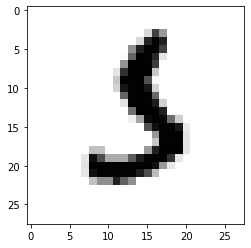

''

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = 340
print('Answer:', test_target[idx])
print('Predict:', test_pred[idx])

plt.imshow(test_input[idx, :, :, 0], cmap='binary')
plt.show()
;